In [1]:
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(42)
import random
random.seed(42)

## Question 1

Import training documents of all categories and plot document number

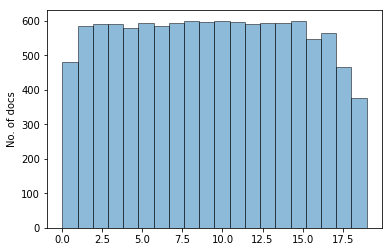

In [2]:
from sklearn.datasets import fetch_20newsgroups

train_all = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
plt.hist(train_all.target,bins=20, alpha=0.5, histtype='bar', ec='black')
plt.ylabel('No. of docs');

Data on each category are balanced from plot

## Question 2

Import data 20newsgroups

In [3]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']
# categories = ['comp.graphics', 'comp.sys.mac.hardware']
train_dataset = fetch_20newsgroups(subset='train', categories = categories,
                                  shuffle=True, random_state=42)
test_dataset = fetch_20newsgroups(subset='test', categories = categories,
                                  shuffle=True, random_state=42)

My method for stemming, not used anymore

In [4]:
# from sklearn.feature_extraction.text import CountVectorizer

# # regular expression for token_pattern, allow only string with at least one character
# # , exclude "_". https://regex101.com/r/iA5bT1/1
# vectorizer = CountVectorizer(min_df=3, stop_words='english',
#                              token_pattern='(?ui)\\b[a-zA-Z0-9]*[a-z]+[a-zA-Z0-9]*\\b')

# X_train_counts = vectorizer.fit_transform(train_dataset.data)
# vectorizer.get_feature_names()

Lemmatization using pos_tag

In [5]:
import nltk
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')

wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

Overwrite analyzer with callable function

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if not word.isdigit())

Construct CountVectorizer to convert documents to document-term text matrices

In [7]:
vectorizer = CountVectorizer(min_df=3, 
                             analyzer=stem_rmv_punc, 
                             stop_words='english')

# fit_tranform train data
X_train_counts = vectorizer.fit_transform(train_dataset.data)
print("train count size ", X_train_counts.shape)


X_test_counts = vectorizer.transform(test_dataset.data)
print("test count size ", X_test_counts.shape)

# vectorizer.get_feature_names()

('train count size ', (4732, 16600))
('test count size ', (3150, 16600))


Use tf-idf to convert the text matrix to number matrix

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# fit_tranform train data
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
print('-' * 20)
print(X_train_counts.toarray()[:10,:5])
print('-' * 20)
print(X_train_tfidf.toarray()[:10,:5])

# transform test data
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)
print('-' * 20)
print(X_test_counts.toarray()[:10,:5])
print('-' * 20)
print(X_test_tfidf.toarray()[:10,:5])

(4732, 16600)
--------------------
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
--------------------
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(3150, 16600)
--------------------
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
--------------------
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
